In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('/content/portland.csv')

In [3]:
data.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [4]:
data.columns=["Month","average monthly bus ride"]

In [5]:
data.shape

(115, 2)

In [6]:
data.isnull().sum()

Month                       0
average monthly bus ride    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Month                     115 non-null    object
 1   average monthly bus ride  115 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [8]:
data['Month']=pd.to_datetime(data['Month'],errors='coerce',format='%Y-%m')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     114 non-null    datetime64[ns]
 1   average monthly bus ride  115 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.9+ KB


In [10]:
data

,Month,average monthly bus ride
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630
...,...,...
110,1969-03-01,1419
111,1969-04-01,1432
112,1969-05-01,1394
113,1969-06-01,1327


In [11]:
data.isnull().sum()

Month                       1
average monthly bus ride    0
dtype: int64

In [12]:
data.dropna(subset=['Month'],inplace=True)

In [13]:
data.isnull().sum()

Month                       0
average monthly bus ride    0
dtype: int64

In [14]:
data.shape

(114, 2)

In [15]:
data.set_index('Month',inplace=True)

In [16]:
data.head()

,average monthly bus ride
Month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


In [17]:
data.dtypes

average monthly bus ride    object
dtype: object

In [18]:
data['average monthly bus ride']=data['average monthly bus ride'].astype(int)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1960-01-01 to 1969-06-01
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   average monthly bus ride  114 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


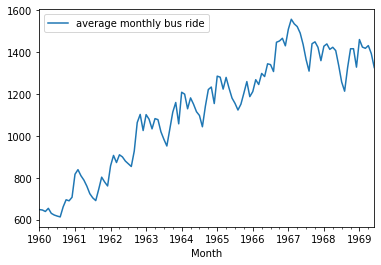

In [20]:
data.plot()

In [21]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
x=data['average monthly bus ride']
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<0.05:
  print("Rail to reject null hyppthese, it mean data is stationary")
else:
  print("Reject null hyppthese, it mean data is not stationary")

ADF Stataics  -1.5365971444531596
p-value 0.5153358797821735
critical values 1028.4238367341432
Reject null hyppthese, it mean data is not stationary


In [23]:
data['average monthly bus ride'].shift(1)

Month
1960-01-01       NaN
1960-02-01     648.0
1960-03-01     646.0
1960-04-01     639.0
1960-05-01     654.0
               ...  
1969-02-01    1461.0
1969-03-01    1425.0
1969-04-01    1419.0
1969-05-01    1432.0
1969-06-01    1394.0
Name: average monthly bus ride, Length: 114, dtype: float64

In [24]:
data['avg monthly busride first difference']=data['average monthly bus ride']-data['average monthly bus ride'].shift(1)

In [25]:
data.head()

,average monthly bus ride,avg monthly busride first difference
Month,,
1960-01-01,648,NaN
1960-02-01,646,-2.0
1960-03-01,639,-7.0
1960-04-01,654,15.0
1960-05-01,630,-24.0


In [26]:
x=data['avg monthly busride first difference'].dropna() 
result=adfuller(x)

print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -1.938696065154843
p-value 0.3140818370608509
critical values 1019.5692927050794
Reject the null hypotheise , it mean data is not stationary


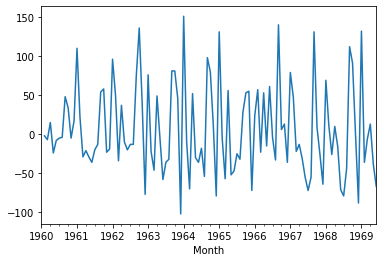

In [27]:
data['avg monthly busride first difference'].plot()

In [28]:
data['avg monthly busride second difference']=data['average monthly bus ride']-data['average monthly bus ride'].shift(12)

In [29]:
data.head(10)

,average monthly bus ride,avg monthly busride first difference,avg monthly busride second difference
Month,,,
1960-01-01,648,NaN,NaN
1960-02-01,646,-2.0,NaN
1960-03-01,639,-7.0,NaN
1960-04-01,654,15.0,NaN
1960-05-01,630,-24.0,NaN
1960-06-01,622,-8.0,NaN
1960-07-01,617,-5.0,NaN
1960-08-01,613,-4.0,NaN
1960-09-01,661,48.0,NaN


In [30]:
x=data['avg monthly busride second difference'].dropna() # learn about result's returns values..
result=adfuller(x)
#result[0]
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.5:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -2.469740563531968
p-value 0.12301141534048143
critical values 901.5419314445506
fail to reject null hypothese h1 , it mean data is stationary


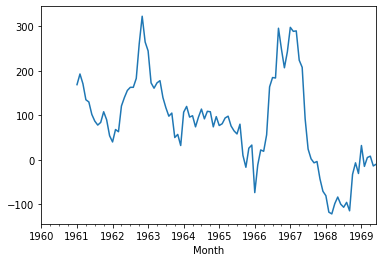

In [31]:
data['avg monthly busride second difference'].plot()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


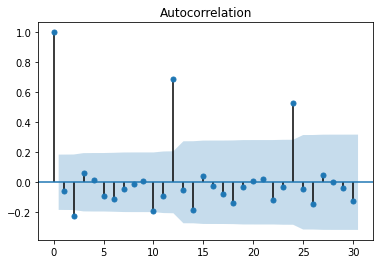

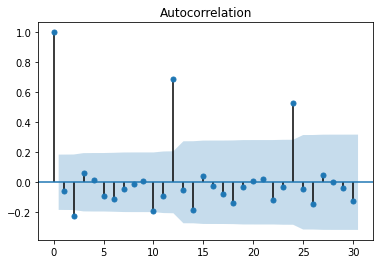

In [33]:
plot_acf(data['avg monthly busride first difference'].iloc[1:],lags=30)

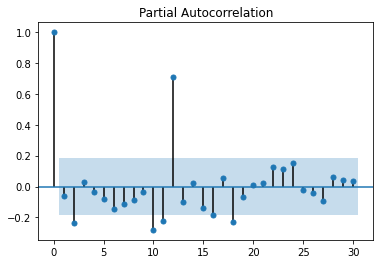

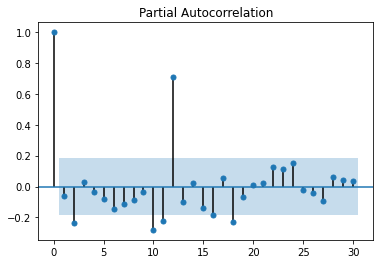

In [34]:
plot_pacf(data['avg monthly busride first difference'].iloc[1:],lags=30)

# **Its ARMA Model**

In [35]:
from statsmodels.tsa.arima_model import ARMA

In [36]:
model=ARMA(data['average monthly bus ride'],order=(2,2))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: Hessia

In [37]:
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                 
====================================================================================
Dep. Variable:     average monthly bus ride   No. Observations:                  114
Model:                           ARMA(2, 2)   Log Likelihood                -625.279
Method:                             css-mle   S.D. of innovations             56.721
Date:                      Mon, 12 Jul 2021   AIC                           1262.559
Time:                              10:58:26   BIC                           1278.976
Sample:                          01-01-1960   HQIC                          1269.222
                               - 06-01-1969                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1686.6169        nan        nan        nan         nan         nan
ar.L1.average monthly bus ride     1.9975      0.001   1645.911      0.000       1.995       2.000
ar.L2.average monthly bus ride    -0.9976      0.001   -756.274      0.000      -1.000      -0.995
ma.L1.average monthly bus ride    -1.0902      0.148     -7.360      0.000      -1.380      -0.800
ma.L2.average monthly bus ride     0.0902      0.123      0.731      0.466      -0.152       0.332
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           -0.0098j            1.0012           -0.0016
AR.2            1.0012           +0.0098j            1.0012            0.0016
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           11.0912           +0.0000j           11.0912            0.0000
-----------------------------------------------------------------------------
"""

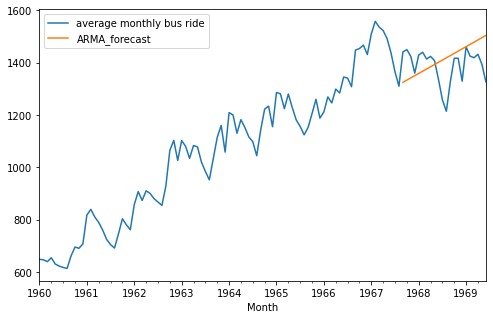

In [38]:
data['ARMA_forecast'] = model_fit.predict(start = 92, end= 114, dynamic= True)  
data[['average monthly bus ride', 'ARMA_forecast']].plot(figsize=(8, 5)) 


# **Its ARIMA Model**

In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
model1=ARIMA(data['average monthly bus ride'],order=(2,1,2))
model_fit1=model1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [41]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D.average monthly bus ride   No. Observations:                  113
Model:                         ARIMA(2, 1, 2)   Log Likelihood                -611.903
Method:                               css-mle   S.D. of innovations             54.314
Date:                        Mon, 12 Jul 2021   AIC                           1235.807
Time:                                10:59:36   BIC                           1252.171
Sample:                            02-01-1960   HQIC                          1242.447
                                 - 06-01-1969                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                6.7323      2.247      2.996      0.003       2.328      11.137
ar.L1.D.average monthly bus ride     0.1449      0.274      0.530      0.597      -0.391       0.681
ar.L2.D.average monthly bus ride     0.2776      0.238      1.167      0.246      -0.188       0.744
ma.L1.D.average monthly bus ride    -0.2315      0.244     -0.949      0.345      -0.710       0.247
ma.L2.D.average monthly bus ride    -0.5258      0.223     -2.354      0.020      -0.963      -0.088
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6548           +0.0000j            1.6548            0.0000
AR.2           -2.1768           +0.0000j            2.1768            0.5000
MA.1            1.1764           +0.0000j            1.1764            0.0000
MA.2           -1.6167           +0.0000j            1.6167            0.5000
-----------------------------------------------------------------------------
"""

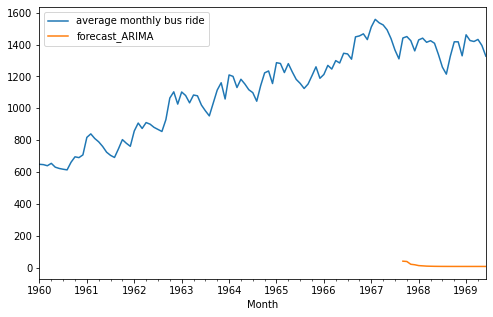

In [42]:
data['forecast_ARIMA'] = model_fit1.predict(start = 92, end= 114, dynamic= True)  
data[['average monthly bus ride', 'forecast_ARIMA']].plot(figsize=(8, 5)) 


# Its s+ARIMA

In [43]:
import statsmodels.api as sm  

model=sm.tsa.statespace.SARIMAX(data['average monthly bus ride'],order=(2,1,2),seasonal_order=(2,1,2,6))
result=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


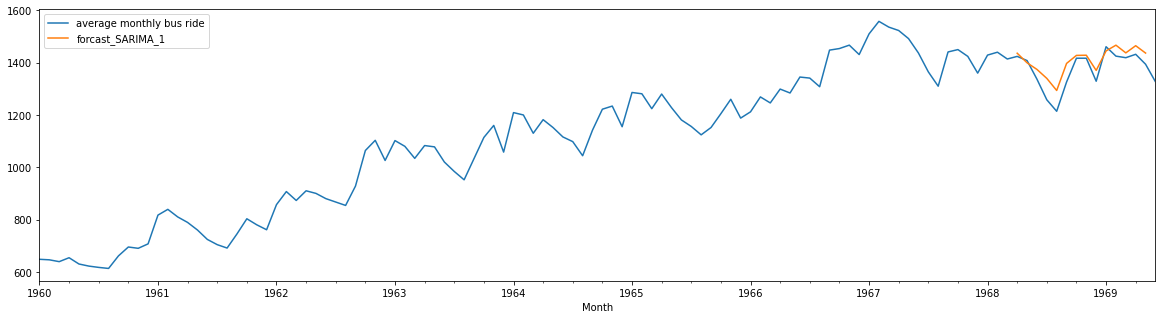

In [44]:
data['forcast_SARIMA_1']=result.predict(start=99, end=112, dynamic=True)
data[['average monthly bus ride','forcast_SARIMA_1']].plot(figsize=(20, 5)) 

# future prediction using SARIMA model

In [45]:
import datetime
from dateutil.relativedelta import relativedelta


start = datetime.datetime.strptime("1969-07-01", "%Y-%m-%d")

date_list = [start + relativedelta(months=x) for x in range(0,12)]
future_prediction = pd.DataFrame(index=date_list, columns= data.columns)
data = pd.concat([data, future_prediction])


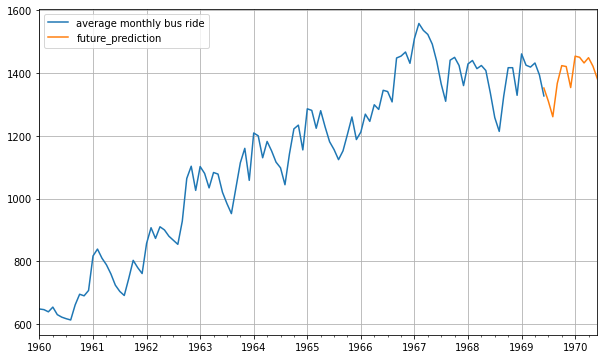

In [46]:
data['future_prediction']=result.predict(start=113, end=130, dynamic=True)
data[['average monthly bus ride','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)
